In [1]:
#Importing module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Reading

In [2]:
#Reading data from dataset
df = pd.read_csv("C:/Users/deepa/Downloads/Electric_Vehicle_Population_Data.csv")
df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702


# Data Cleaning

In [3]:
#Check and fill model column with most column value
df[df['Model'].isnull()]
df['Model'].fillna(value='XC90',inplace=True)

In [4]:
#Check cars for volvo company
volvo = df[df['Make']=='VOLVO']

In [5]:
#Check volvo car model to find most common car model
volvo.groupby('Model')['VIN (1-10)'].count()

Model
C40     132
S60      82
S90      25
V60      12
XC40    495
XC60    702
XC90    840
Name: VIN (1-10), dtype: int64

In [6]:
#Drop unnecessary column 
df.drop('Vehicle Location',axis=1,inplace=True)

In [7]:
#Fill column missing value
df['Legislative District'].fillna(value='Not_known',inplace=True)

In [8]:
#Find most common electric utility to fill value
df['Electric Utility'].value_counts()

PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                               40247
PUGET SOUND ENERGY INC                                                                      22172
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                21447
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                             6522
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY              5053
                                                                                            ...  
BONNEVILLE POWER ADMINISTRATION||PENINSULA LIGHT COMPANY                                        1
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ASOTIN COUNTY                                      1
CITY OF SEATTLE - (WA)                                                                          1
BONNEVILLE POWER ADMINISTRATION||NESPELEM VALLEY ELEC COOP, INC                                 1
BONNEVILLE POWER ADM

In [9]:
#Fill electric utility with most common value
df['Electric Utility'].fillna(value='PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',inplace=True)

In [10]:
#Checking null values again
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [11]:
#Rename column name
df.rename(columns={'VIN (1-10)':'VIN'},inplace=True)

In [12]:
df['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            86044
Plug-in Hybrid Electric Vehicle (PHEV)    26590
Name: Electric Vehicle Type, dtype: int64

In [13]:
#Checking duplicate values
df[df.duplicated()]

,VIN,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract


In [14]:
#set unique values column as index
df.set_index('VIN',inplace=True)

In [15]:
#Rename column
df.rename(columns={'Clean Alternative Fuel Vehicle (CAFV) Eligibility':'capf_eligibility'},inplace=True)

In [16]:
#Drop unnecessary column
df.drop('2020 Census Tract',axis = 1,inplace=True)

In [17]:
#Join two column
df['location'] = df['City']+","+df['State']

In [18]:
df.drop(['City','State'],axis=1,inplace=True)

In [20]:
df.dtypes

County                   object
Postal Code               int64
Model Year                int64
Make                     object
Model                    object
Electric Vehicle Type    object
capf_eligibility         object
Electric Range            int64
Base MSRP                 int64
Legislative District     object
DOL Vehicle ID            int64
Electric Utility         object
location                 object
dtype: object

# Data Analysis

In [19]:
#Find no. of vehicle by year
no_of_vehi = df.groupby('Model Year').agg(no_of_vehicle=('DOL Vehicle ID','count'))
no_of_vehi

,no_of_vehicle
Model Year,
1997,1
1998,1
1999,3
2000,10
2002,2
2008,23
2010,24
2011,840
2012,1705


In [21]:
#Company which has model before 2000
df[df['Model Year']<2000][['Make','Model']].value_counts()

Make       Model      
FORD       RANGER         4
CHEVROLET  S-10 PICKUP    1
dtype: int64

In [22]:
#Company which has model between 2000-2010
df[(df['Model Year']>2000) & (df['Model Year']<2010)][['Make','Model']].value_counts()

Make    Model   
TESLA   ROADSTER    23
TOYOTA  RAV4         2
dtype: int64

In [23]:
#Company which has model after 2010
df[df['Model Year']>2010]['Make'].value_counts()

TESLA             52031
NISSAN            12880
CHEVROLET         10181
FORD               5805
BMW                4680
KIA                4483
TOYOTA             4403
VOLKSWAGEN         2514
AUDI               2332
VOLVO              2288
CHRYSLER           1794
HYUNDAI            1412
JEEP               1152
RIVIAN              885
FIAT                822
PORSCHE             818
HONDA               792
MINI                632
MITSUBISHI          588
POLESTAR            558
MERCEDES-BENZ       506
SMART               273
JAGUAR              219
LINCOLN             168
CADILLAC            108
LUCID MOTORS         65
SUBARU               59
LAND ROVER           38
LEXUS                33
FISKER               20
GENESIS              18
AZURE DYNAMICS        7
TH!NK                 3
BENTLEY               3
Name: Make, dtype: int64

In [24]:
# Cars which have all info 
all_cars = df[(df['Electric Range']!=0) & (df['capf_eligibility']!='Eligibility unknown as battery range has not been researched') & (df['Base MSRP']!=0)]

In [25]:
df['capf_eligibility'].value_counts()

Clean Alternative Fuel Vehicle Eligible                         58639
Eligibility unknown as battery range has not been researched    39236
Not eligible due to low battery range                           14759
Name: capf_eligibility, dtype: int64

In [26]:
#Rename column name
all_cars.rename(columns={'Make':'Brand'},inplace=True)

C:\Users\deepa\AppData\Local\Temp\ipykernel_5732\1849757490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_cars.rename(columns={'Make':'Brand'},inplace=True)


In [27]:
df['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            86044
Plug-in Hybrid Electric Vehicle (PHEV)    26590
Name: Electric Vehicle Type, dtype: int64

In [30]:
all_cars = all_cars.reset_index()

In [35]:
# No of vehicle as per county
all_cars['County'].value_counts()

King                    1903
Snohomish                361
Pierce                   294
Clark                    176
Kitsap                   136
Whatcom                  103
Thurston                 102
Spokane                   77
Skagit                    42
Benton                    42
Island                    40
San Juan                  31
Mason                     21
Cowlitz                   17
Grays Harbor              16
Chelan                    16
Jefferson                 16
Kittitas                  15
Yakima                    13
Clallam                   12
Grant                     10
Douglas                   10
Franklin                   9
Walla Walla                8
Lewis                      8
Pacific                    6
Stevens                    4
Whitman                    3
Klickitat                  3
Okanogan                   3
Wahkiakum                  2
Skamania                   2
Asotin                     2
Lincoln                    2
Multnomah     

In [31]:
all_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3512 entries, 0 to 3511
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   VIN                    3512 non-null   object
 1   County                 3512 non-null   object
 2   Postal Code            3512 non-null   int64 
 3   Model Year             3512 non-null   int64 
 4   Brand                  3512 non-null   object
 5   Model                  3512 non-null   object
 6   Electric Vehicle Type  3512 non-null   object
 7   capf_eligibility       3512 non-null   object
 8   Electric Range         3512 non-null   int64 
 9   Base MSRP              3512 non-null   int64 
 10  Legislative District   3512 non-null   object
 11  DOL Vehicle ID         3512 non-null   int64 
 12  Electric Utility       3512 non-null   object
 13  location               3512 non-null   object
dtypes: int64(5), object(9)
memory usage: 384.2+ KB


In [34]:
all_cars.columns

Index(['VIN', 'County', 'Postal Code', 'Model Year', 'Brand', 'Model',
       'Electric Vehicle Type', 'capf_eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Electric Utility', 'location'],
      dtype='object')

# Data Visualization

Text(0.5, 1.0, 'Brand v/s No. of Cars')

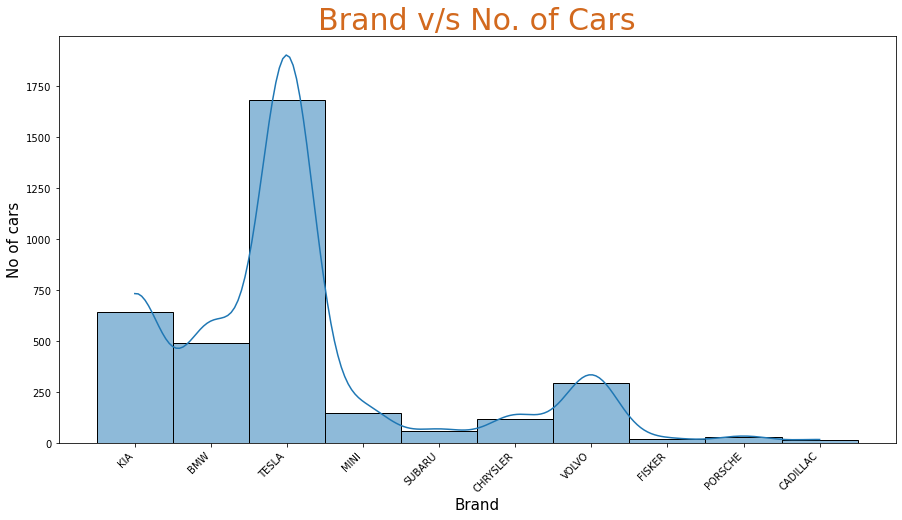

In [54]:
# Graph to show no_of cars which have all data
plt.figure(figsize = (15,7.5))
sns.histplot(x='Brand',data = all_cars,kde=True)
plt.xlabel('Brand',fontsize= 15)
plt.ylabel('No of cars',fontsize= 15)
plt.xticks(rotation=45, ha='right')
plt.title('Brand v/s No. of Cars',color ='Chocolate',fontsize=30)

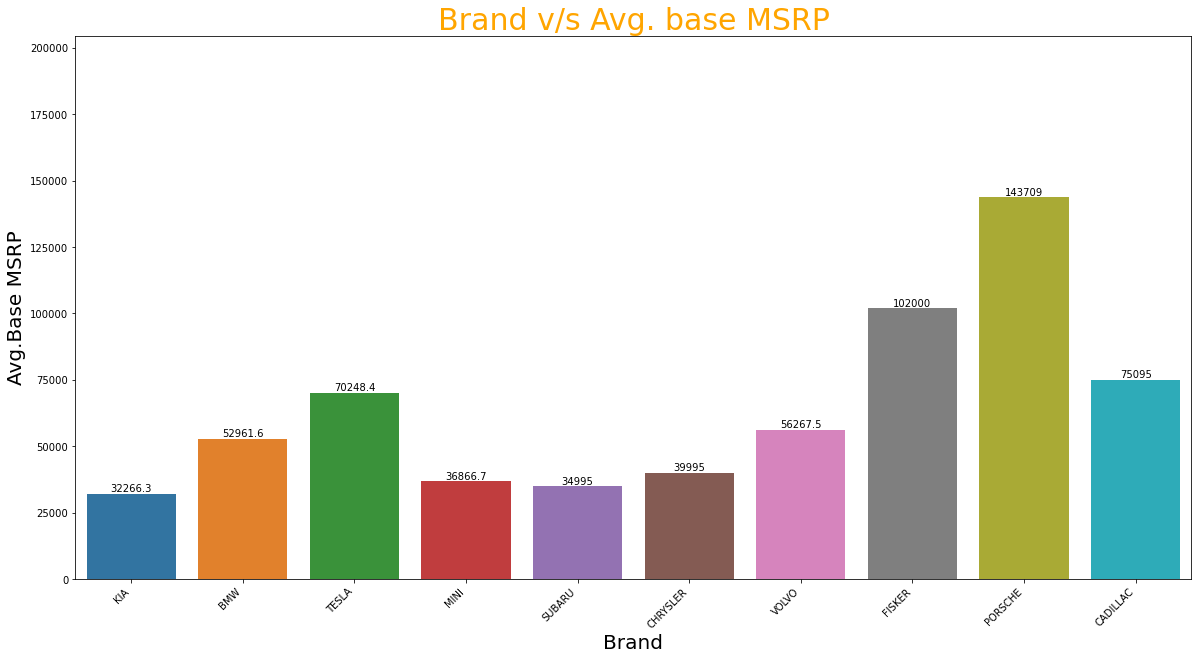

In [28]:
#Graph to show avg. base price as per brand
plt.figure(figsize=(20,10))
ax = sns.barplot(x='Brand',y='Base MSRP',data = all_cars,errwidth=0)
plt.xlabel('Brand',fontsize=20)
plt.ylabel('Avg.Base MSRP',fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.title('Brand v/s Avg. base MSRP',color ='orange',fontsize=30)
for i in ax.containers:
    ax.bar_label(i,)

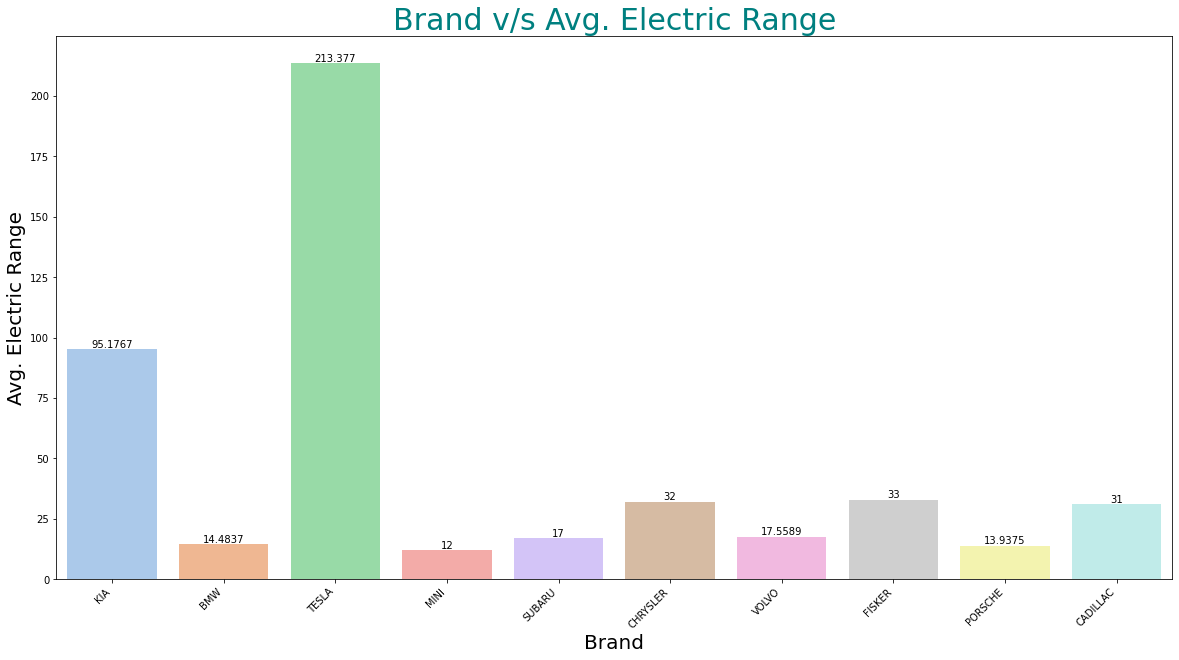

In [29]:
#Graph to show avg. electric range as per brand
plt.figure(figsize=(20,10))
ax = sns.barplot(x='Brand',y='Electric Range',data = all_cars,errwidth=0,palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Brand',fontsize=20)
plt.ylabel('Avg. Electric Range',fontsize=20)
plt.title('Brand v/s Avg. Electric Range',color ='Teal',fontsize=30)
for i in ax.containers:
    ax.bar_label(i,)

In [32]:
#Preparing data for pie chart
df['capf_eligibility'].value_counts()
lst1 = ['Capf Eligible','Eligibility unknown','Not eligible']
lst2 = [58639,39236,14759]

Text(0.5, 1.0, 'Pie Chart for capf Eligibility')

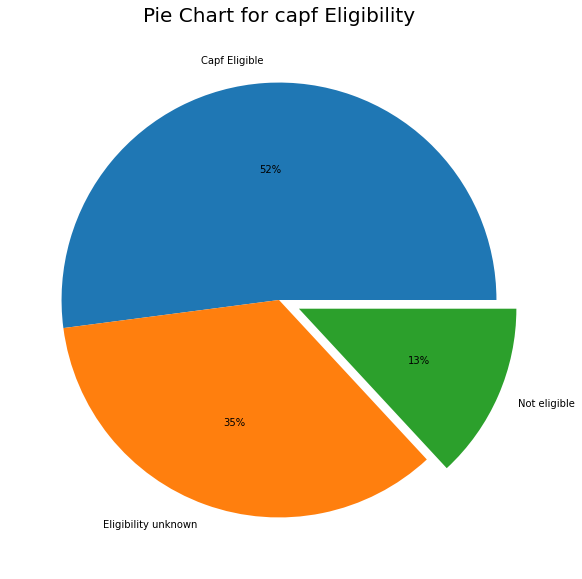

In [56]:
#Pie chart to show capf eligibility
plt.figure(figsize = (20,10))
explode = [0,0, 0.1]
plt.pie(lst2,labels=lst1, autopct='%.0f%%',explode=explode)
plt.title('Pie Chart for capf Eligibility',fontsize=20)

Text(0.5, 1.0, 'County v/s No. of Cars')

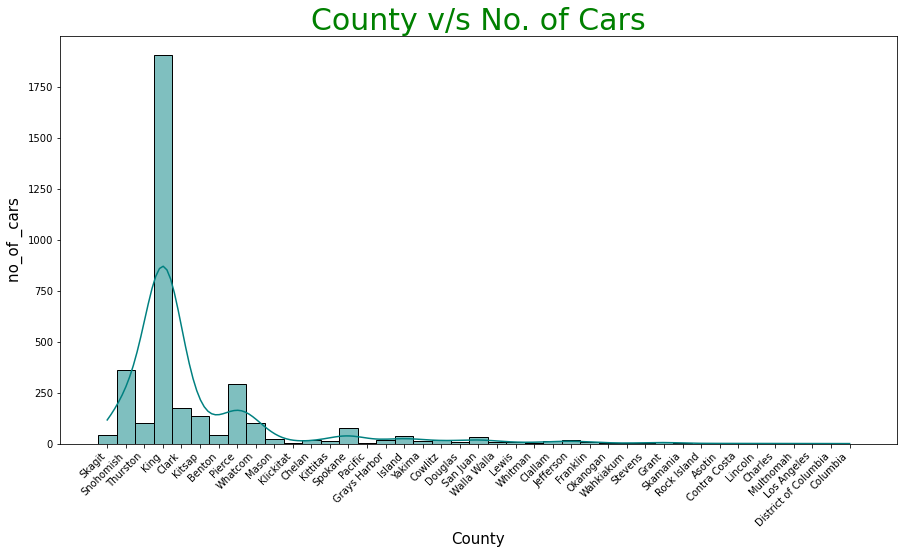

In [36]:
#Graph to show cars per county
plt.figure(figsize = (15,7.5))
sns.histplot(x='County',data = all_cars,color = 'Teal',kde=True)
plt.ylabel('no_of _cars',fontsize = 15)
plt.xlabel('County',fontsize = 15)
plt.xticks(rotation=45, ha='right')
plt.title('County v/s No. of Cars',color ='Green',fontsize=30)

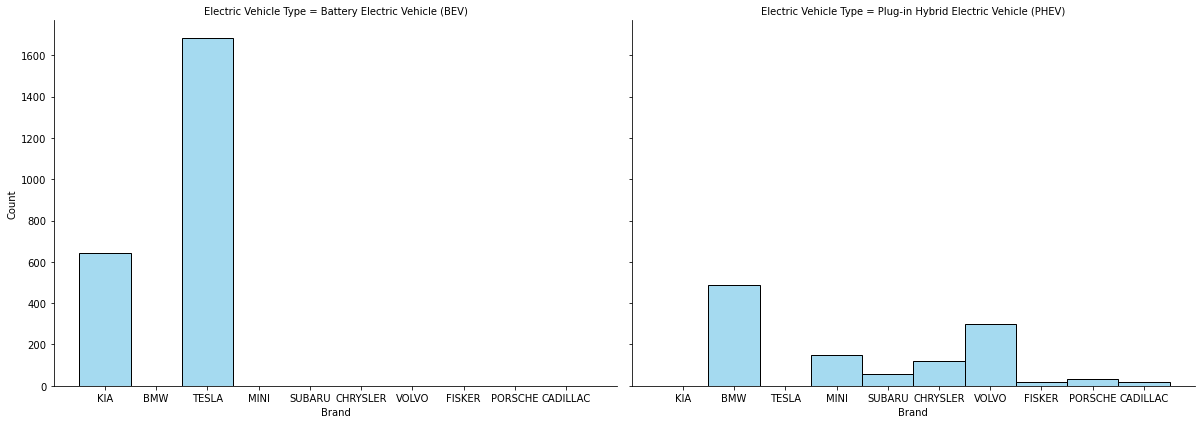

In [37]:
#Graph to show electric car type as per brand 
sns.displot(data=all_cars, x='Brand', kind='hist',bins=18, col='Electric Vehicle Type',height=6,aspect=1.4,color='skyblue')

Text(0.5, 1.0, 'Model Year v/s No. of cars')

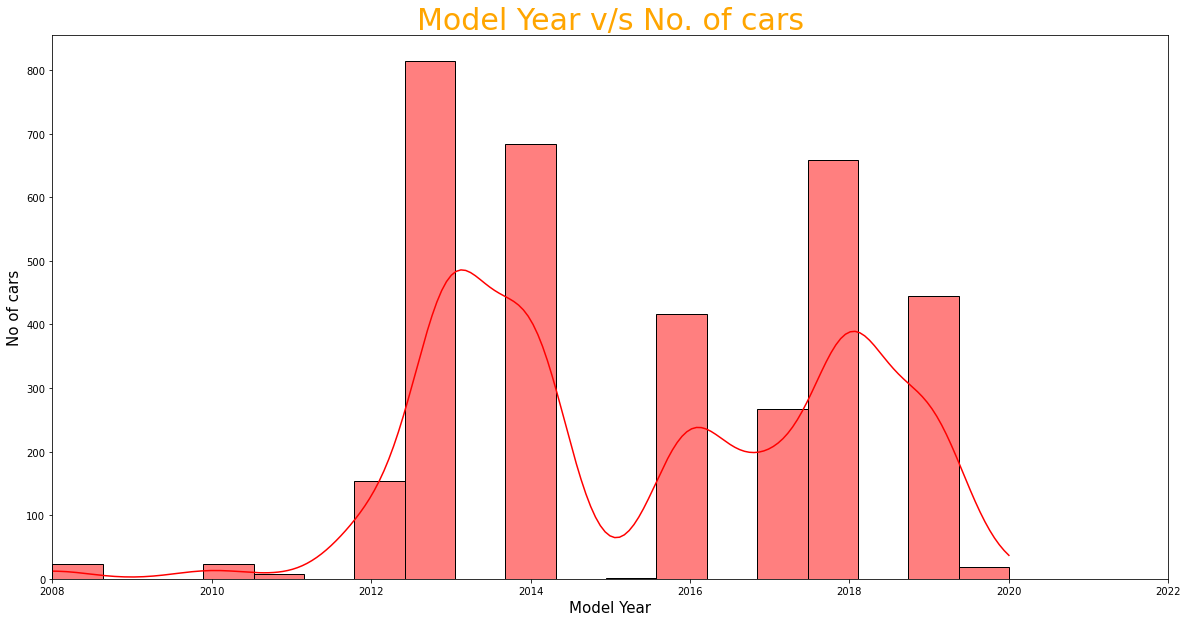

In [38]:
#Graph to show no of cars as per year
plt.figure(figsize=(20,10))
sns.histplot(x='Model Year',data = all_cars,kde=True,color = 'red')
plt.xlabel('Model Year',fontsize= 15)
plt.ylabel('No of cars',fontsize= 15)
plt.xlim(2008,2022)
plt.title('Model Year v/s No. of cars',color ='orange',fontsize=30)

In [39]:
# Cars with missing information
all_missing_cars = df[(df['Electric Range']==0) & (df['capf_eligibility']=='Eligibility unknown as battery range has not been researched') & (df['Base MSRP']==0)]

In [40]:
all_missing_cars.reset_index(inplace=True)

Text(0.5, 1.0, 'Brand v/s No. of Cars')

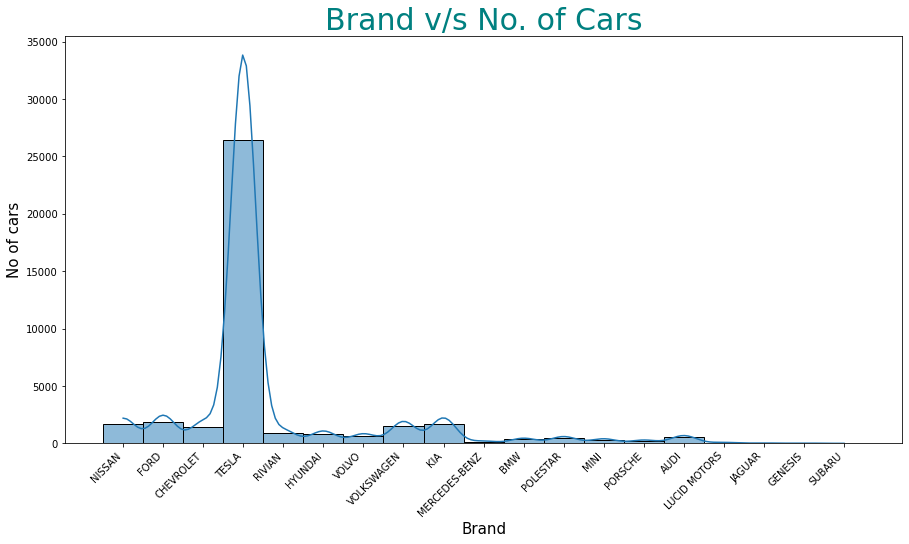

In [41]:
# Graph to show no_of cars which have missing data
plt.figure(figsize = (15,7.5))
sns.histplot(x='Make',data = all_missing_cars,kde=True)
plt.xlabel('Brand',fontsize= 15)
plt.ylabel('No of cars',fontsize= 15)
plt.xticks(rotation=45, ha='right')
plt.title('Brand v/s No. of Cars',color ='Teal',fontsize=30)

In [42]:
#Groupby to show company,model and no. of cars for missing data 
all_missing_cars.groupby(['Make','Model'])['VIN'].count()

Make           Model           
AUDI           E-TRON                278
               E-TRON GT              75
               E-TRON SPORTBACK       99
               Q4                     62
               RS E-TRON GT           16
BMW            I3                     31
               I4                    155
               IX                    163
CHEVROLET      BOLT EUV              126
               BOLT EV              1320
FORD           F-150                 172
               MUSTANG MACH-E       1626
               TRANSIT               104
GENESIS        G80                     5
               GV60                   13
HYUNDAI        IONIQ                   8
               IONIQ 5               542
               KONA ELECTRIC         287
JAGUAR         I-PACE                 25
KIA            EV6                  1060
               NIRO                  665
               SOUL EV                 3
LUCID MOTORS   LUCID AIR              65
MERCEDES-BENZ  EQB-CLASS 

In [43]:
#Groupby to show company,model and no. of cars
all_cars.groupby(['Brand','Model'])['VIN'].count()

Brand     Model     
BMW       330E           183
          530E           277
          740E            30
CADILLAC  CT6             16
CHRYSLER  PACIFICA       119
FISKER    KARMA           20
KIA       SOUL           407
          SOUL EV        238
MINI      COUNTRYMAN     150
PORSCHE   918              1
          CAYENNE         19
          PANAMERA        12
SUBARU    CROSSTREK       58
TESLA     MODEL S       1631
          ROADSTER        54
VOLVO     XC60           214
          XC90            83
Name: VIN, dtype: int64

Text(0.5, 1.0, 'Brand v/s Avg. base MSRP')

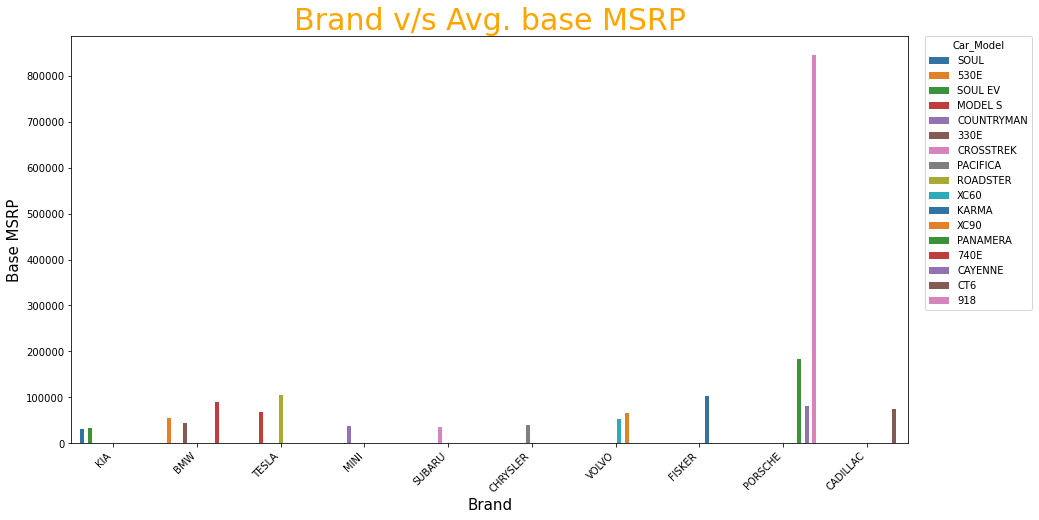

In [44]:
#Graph to show car brand vs base MSRP
plt.figure(figsize=(15,7.5))
sns.barplot(x='Brand',y='Base MSRP',data = all_cars,hue = 'Model',errwidth=False,palette='tab10')
plt.xlabel('Brand',fontsize=15)
plt.ylabel('Base MSRP',fontsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,title='Car_Model')
plt.xticks(rotation=45, ha='right')
plt.title('Brand v/s Avg. base MSRP',color ='orange',fontsize=30)

In [45]:
#Removing the outliers as per price column
all_cars.drop(1915,axis=0,inplace=True)

(2010.0, 2024.0)

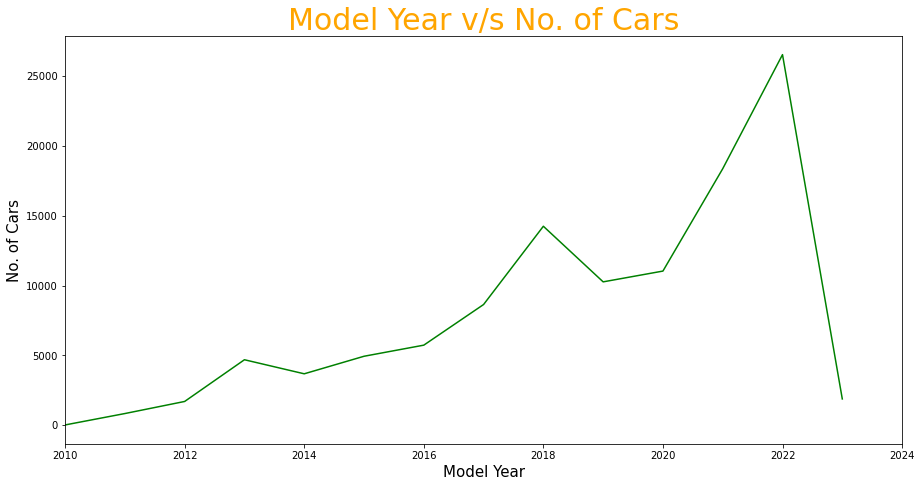

In [46]:
#Line graph model year vs no. of vehicle
plt.figure(figsize=(15,7.5))
sns.lineplot(x='Model Year',y='no_of_vehicle',data = no_of_vehi,color='Green')
plt.xlabel('Model Year',fontsize = 15)
plt.ylabel('No. of Cars',fontsize=15)
plt.title('Model Year v/s No. of Cars',color ='orange',fontsize=30)
plt.xlim(2010,2024)

Text(0.5, 1.0, 'Brand v/s Avg. base MSRP(By Model)')

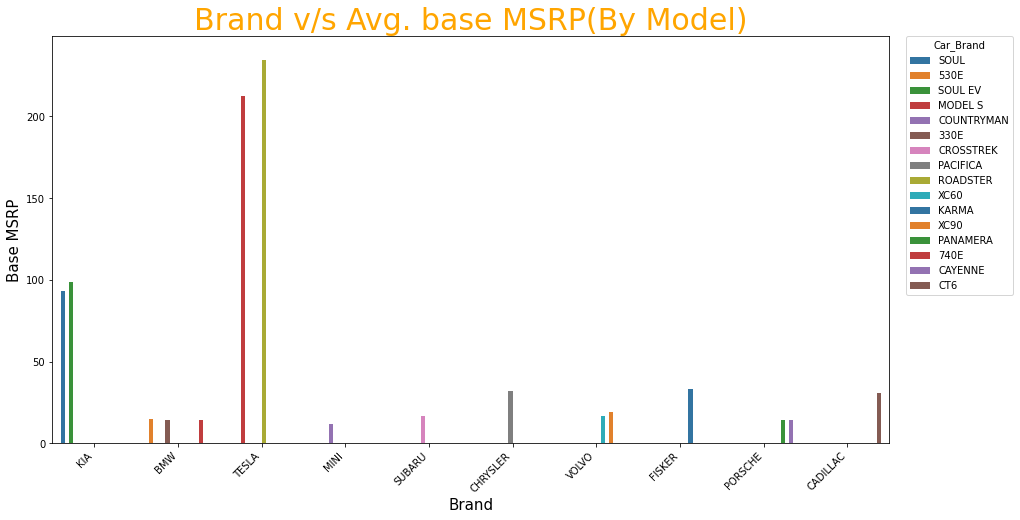

In [48]:
plt.figure(figsize=(15,7.5))
sns.barplot(x='Brand',y='Electric Range',data = all_cars,hue = 'Model',errwidth=False,palette='tab10')
plt.xlabel('Brand',fontsize=15)
plt.ylabel('Base MSRP',fontsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,title='Car_Brand')
plt.xticks(rotation=45, ha='right')
plt.title('Brand v/s Avg. base MSRP(By Model)',color ='orange',fontsize=30)

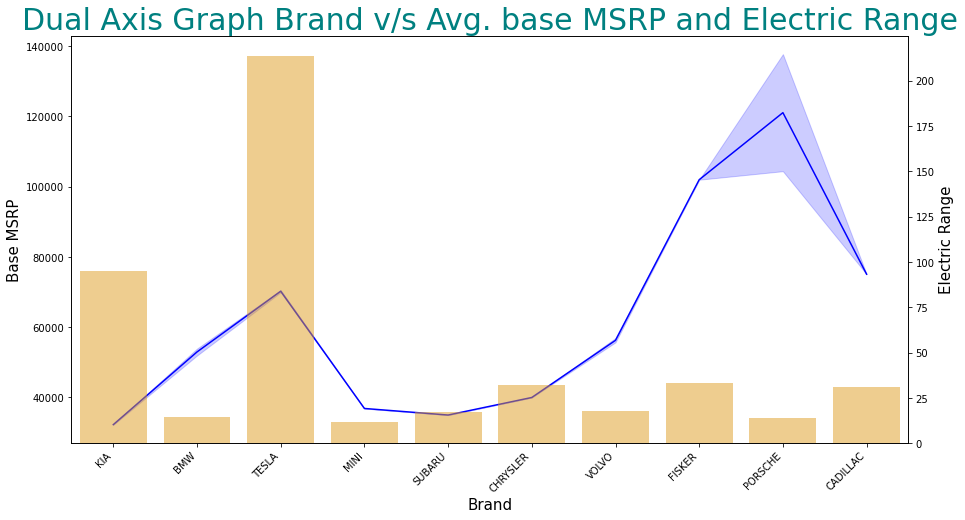

In [49]:
#Dual Axis graph to choose car brand with good electric range and reasonbale budget
# plot line graph on axis #1
plt.figure(figsize=(15,7.5))
ax1 = sns.lineplot(x='Brand',y='Base MSRP',data=all_cars,sort=False,color='blue')
plt.xlabel('Brand',fontsize=15)
plt.ylabel('Base MSRP',fontsize=15)
plt.xticks(rotation=45, ha='right')
# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar graph on axis #2
sns.barplot(x='Brand',y='Electric Range',data=all_cars,color='orange',alpha=0.5,errwidth = False,ax = ax2)
plt.ylabel('Electric Range',fontsize=15)
plt.title('Dual Axis Graph Brand v/s Avg. base MSRP and Electric Range',color ='Teal',fontsize=30)
plt.show()

In [50]:
#Craeting datframe to plot eletric utility vs no of vehicles
df2 = all_cars.groupby('Electric Utility').agg(no_of_cars=('VIN','count')).sort_values(by=['no_of_cars'],ascending=False)

Text(0.5, 1.0, 'Electric Utility v/s No. of cars')

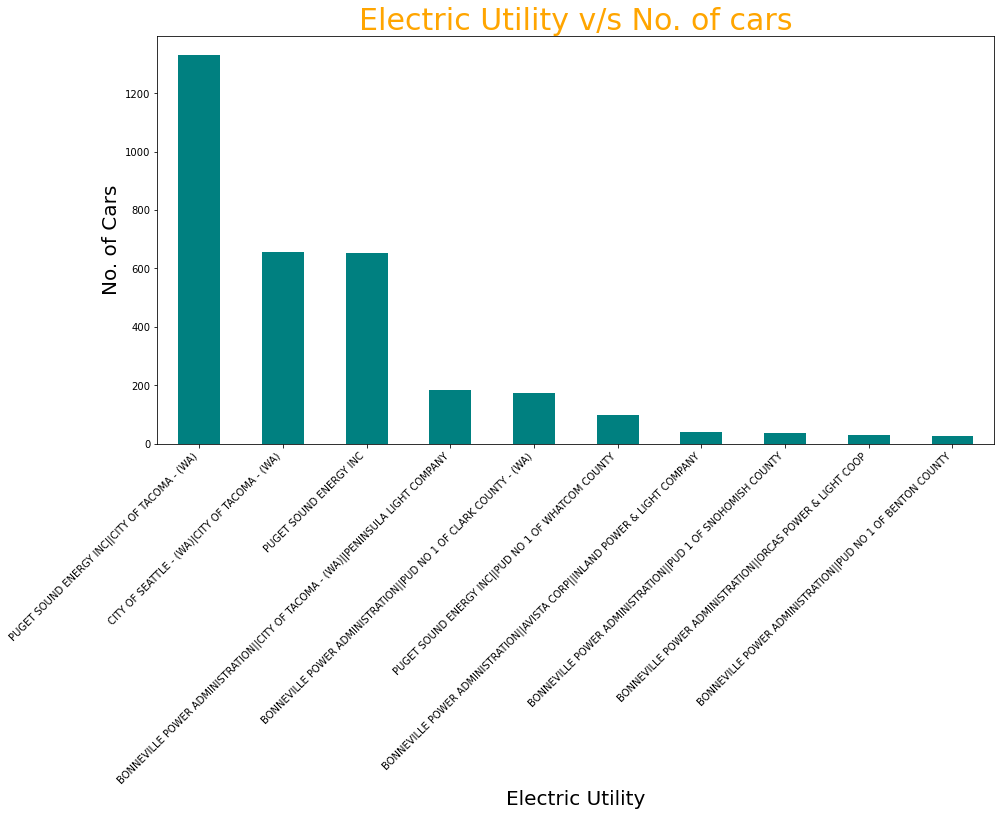

In [51]:
#Bar Graph to show no. of cars as per top 10 electric utility
plt.figure(figsize=(15,7.5))
df2['no_of_cars'].nlargest(n=10).plot(kind='bar',color = 'Teal')
plt.xlabel('Electric Utility',fontsize=20)
plt.ylabel('No. of Cars',fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.title('Electric Utility v/s No. of cars',fontsize = 30,color = 'Orange')